# QP-3 : Bernstein-Vazrani Algorithm

 - Name : **Jayant Som**
 
 - Contact : **jsom@buffalo.edu | 716-348-7708**

**_______________________________________________________________________________________________________________**

## 1. Quantum Circuit creation

#### i) Imports :

In [1]:
# Importing the QuantumCircuit class from Qiskit
# The QuantumCircuit class is used to create quantum circuits
from qiskit import QuantumCircuit

# Importing the numpy library
# Numpy is used for working with arrays and perform numerical operations
import numpy as np

#### ii) Quantum circuit creation and adding different components:

In [2]:
# Number of qubits 
# It should be greater than 5, so I am taking 6
n = 6

In [3]:
# Generate the bit string "s"
# Random integer in [0,.....2^nqubits - 1]
s=26
#s = np.random.randint(2**n)
# Converting to binary string
s_str = format(s, '0' + str(n) + 'b')  
print("Random integer:", s)
print("Secret string:", s_str)

Random integer: 26
Secret string: 011010


In [4]:
# Creating a Quantum Circuit 
# n+1 qubits in x-register 
# n classical bits in y-register for measurement
circuit = QuantumCircuit(n + 1, n)

# Initializing the y-register to |-> state
# So, applying X and H to |0>
circuit.x(n)
circuit.h(n)

# Applying H to all x-register qubits
# H on qubit i one by one
# Used to create superposition of all binary states |0> to |+>.
for i in range(n):
    circuit.h(i)

# Barrier : to separate the oracle from rest of the circuit
circuit.barrier()

# Building an Oracle 
# with CNOT's from bit-'s'(if s=1) in x-register to y-register in |->
for i in range(n):
    # if ith bit of 's' is not 0
    if s & (1 << i):
        # CNOT from qubit i (x-register) to qubit n (y-register)
        # Control is i, Target is n
        circuit.cx(i, n)
        
# Barrier : to separate the oracle from rest of the circuit
circuit.barrier()

# Apply H to all x-register qubits
# H on qubit i one by one
# Used to convert the superposition state to computational basis state s  
for i in range(n):
    circuit.h(i)

# Barrier : to separate the rest of the circuit 
circuit.barrier()

# Measuring all x-register qubits
for i in range(n):
    # Measuring qubit i
    # Storing result in classical bit i
    circuit.measure(i, i)

#### iii) Circuit diagram :

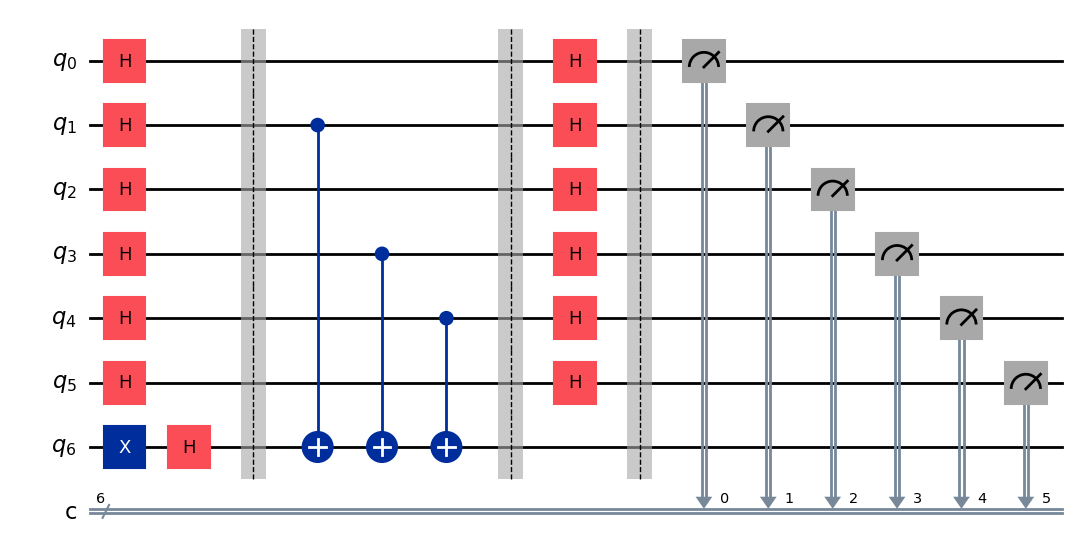

In [5]:
# The draw method is used to visualize the quantum circuit.
# I am drawing the circuit using the 'mpl' output and 'iqp' style
circuit.draw(output='mpl', style='iqp')

***Fig 01 : Quantum Circuit for the Bernstein-Vazrani Algorithm***

The above circuit diagram comprises of following notations and components :

**Circuit Notations :**

- **qo, q1, q2, q3, q4, q5** are the 6 qubits represented by the solid horizontal line. (x-registers)
- **q6** is the 7th qubit represented by the solid horizontal line. (y-register)
- **c** is the classical bit after measurement which is represented by the double lines.
- **6/** above the double lines represents the no. of classical data bits measurements (0,1,2,3,4,5).

**Note : In Qiskit, the initial state is |q5 q4 q3 q2 q1 q0> where q5 the most significant bit and q0 is the least significant bit.**

**Circuit Components (left to right according to time step) :**

- **H on q0, q1, q2, q3, q4 and q5** in orange box represents the Hadamard gate. It converts initial state |0> to |+>, so it produces superposition on all x-registers. 
- **X on q6** in blue box represents the X gate. Here, it inverts intital state |0> to |1>.
- **H on q6** in orange box represents the Hadamard gate. Here, it converts |1> to |-> on the y-register.
- **CNOT** denoted by dark-blue line where **.** is the control and **+** is the target. There can be multiple CNOT gates in the circuit depending upon the secret string. This group of CNOT gates is called the **Oracle**.

    ***Note** : The condition in the program **if s & (1 << i)**: ensures that a CNOT gate is applied only if the ith bit of s is 1. If the ith bit is 1, then a CNOT gate is added with qubit i (from the x-register) as the control and qubit n (the y-register) as the target.*
  
- **Barrier** denoted by dotted lines separates the oracle from rest of the circuit.
- **H on q0, q1, q2, q3, q4 and q5** in orange box represents the Hadamard gate. It converts the superposition state to computational basis state. This is used to obtain the secret state s again.
- **Meters** in gray boxes represents the Measurement operation on q0, q1, q2, q3, q4 and q5.

## 2. Simulation code and output

#### i) Imports :

In [6]:
# The qiskit_aer library provides backend quantum simulators 
# I am importing the Aer module which contains various type of simulators.
from qiskit_aer import Aer

# I am importing the transpile function from the qiskit library
# Transpile function is required to ensure that my circuit 
# is able to run on the simulator.
from qiskit import transpile

# Importing the plot_histogram function from qiskit 
# It used to visualize the simulation result.
from qiskit.visualization import plot_histogram

#### ii) Getting the Simulator and running it

In [7]:
# The qasm simulator runs the circuit and its result is classical bits.
simulator = Aer.get_backend("qasm_simulator")

# Transpile transforms the circuit to something appropriate for the machine.
# I am transpiling my circuit for the backend qasm simulator
sim_circuit = transpile(circuit, backend = simulator)

# The run method in the simulator executes the transpiled circuit.
# I am running the trial 4096 times.
job_sim = simulator.run(sim_circuit, shots = 4096)

#### iii) Fetching the result and plotting histogram :

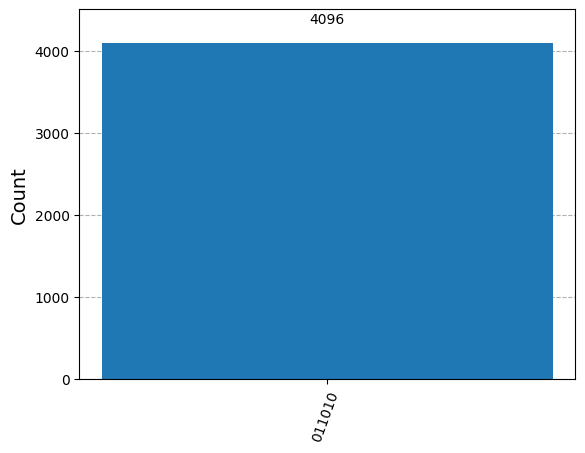

In [8]:
# I am fetching the results of the simulation job execution.
# This result contains the counts of each measurement outcome.
result_sim = job_sim.result()

# result.get_counts() method is used to find the count of different outcomes.
# I am generating and displaying a histogram of the simulation outcomes.
plot_histogram(result_sim.get_counts(circuit))

***Fig 02 : Measured state Vs Counts***

The histogram represents the probability of measuring the output states when my quantum circuit runs on the simulator.

In the above histogram :
- The **x-axis** represents the measured states.
- The **y-axis** represents the number of times each state was measured.

I ran my circuit for 4096 trials. 

Here, on the x-axis, there is 011010 with count 4096, which means that the measurement found the qubits q5, q4, q3, q2, q1, q0 in 0, 1, 1, 0, 1, 0 state with 100% probability.

So, I get back my secret string s = 011010 with 100% probability after the measurement.

## 3. IBM QC Hardware calculation

#### i) Imports :

In [9]:
# Importing the QiskitRuntimeService class from qiskit_ibm_runtime module
# The QiskitRuntimeService class is used to connect to IBMQ Services 
# and run actual IBM QC hardware
from qiskit_ibm_runtime import QiskitRuntimeService

# Importing the SamplerV2 class from qiskit_ibm_runtime module
# The SamplerV2 class is used to find the probabilities of output states
from qiskit_ibm_runtime import SamplerV2 as Sampler

#### ii) Getting the Hardware and running it

In [10]:
# I am creating a new object of QiskitRuntimeService
# It is used to connect with my IBMQ account and use the sevices
service = QiskitRuntimeService()


# backends method is used to fetch list of all available quantum backends
mybackends = service.backends(operational = True, simulator = False, 
                              min_num_qubits = 5)
mybackends

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>]

In [11]:
# least_busy method is used to pick the best available backend
device = service.least_busy(operational = True, simulator = False, 
                            min_num_qubits = 5) 
device

<IBMBackend('ibm_brisbane')>

In [12]:
# Transpile transforms the circuit to something appropriate for the hardware
# seed is used to get the same transpiled circuit every time I run
transpiled_circuit = transpile(circuit, device, seed_transpiler = 13)

# SamplerV2 is used to find the probabilities of output states
# mode = device is used to select the least busy hardware I got above
sampler = Sampler(mode = device)

# The run method in the sampler executes the transpiled circuit
job_hardware = sampler.run([transpiled_circuit]) 

#### iii) Fetching the result and plotting histogram :

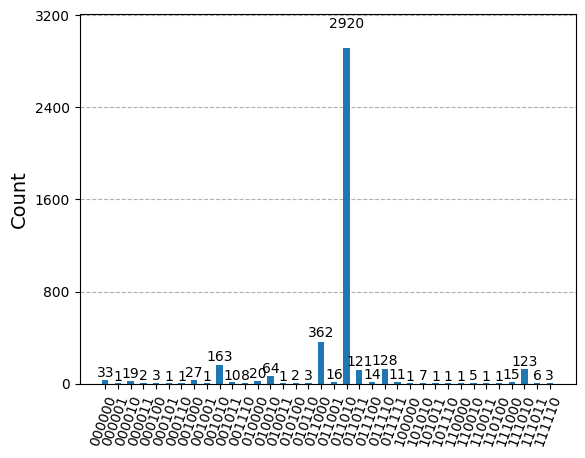

In [13]:
# I am fetching the results of the sampler job execution.
# This result contains the counts of each measurement outcome.
result_hardware = job_hardware.result()

# the 1st element at 0th index is the public result
pub_result = result_hardware[0]

# I am extracting the classical data part from the public result
# the values of c tells about the count of each outcome
classical_data = pub_result.data.c

# .get_counts() is used to measure the data in the classical bit 'c'
# I am generating and displaying a histogram of the execution outcomes
plot_histogram(classical_data.get_counts()) 

***Fig 03 : Measured state Vs Counts***

The histogram represents the probability of measuring the output states when my quantum circuit runs on the IBM QC Hardware.

In the above histogram :
- The **x-axis** represents the measured states.
- The **y-axis** represents the number of times each state was measured.

The circuit ran for 4096 trials on the IBM QC Hardware. 

Here, on the x-axis, there are multiple different measured states with smaller counts and 011010 with count 3199.

3199/4096 = 0.7810

This means that the measurement found the qubits q5, q4, q3, q2, q1, q0 in 0, 1, 1, 0, 1, 0 state with 78.1 % probability.

So, I get back my secret string s = 011010 with 93.87 % probability after the measurement. This proves that I successfully got back my secret string with a high probability. 

Also the simulator and the IBM QC Hardware produced very similar results, which validates that the Bernstein-Vazrani Algorithm worked fine.
